<a href="https://colab.research.google.com/github/TAUforPython/machinelearning/blob/main/Kuramoto%20Neural%20Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.biorxiv.org/lookup/doi/10.1101/2025.09.26.678831
Deep Coupled Kuramoto Oscillatory Neural Network (DcKONN): A Biologically Inspired Deep Neural Model for EEG Signal Analysis

# Simple two Kuramoto osciliator

<>:52: SyntaxWarning: invalid escape sequence '\o'
<>:53: SyntaxWarning: invalid escape sequence '\o'
<>:52: SyntaxWarning: invalid escape sequence '\o'
<>:53: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipython-input-3182701297.py:52: SyntaxWarning: invalid escape sequence '\o'
  axs[0].plot(time, theta1, label=f'Oscillator 1 ($\omega_1$ = {omega1})', linewidth=2)
/tmp/ipython-input-3182701297.py:53: SyntaxWarning: invalid escape sequence '\o'
  axs[0].plot(time, theta2, label=f'Oscillator 2 ($\omega_2$ = {omega2})', linewidth=2)


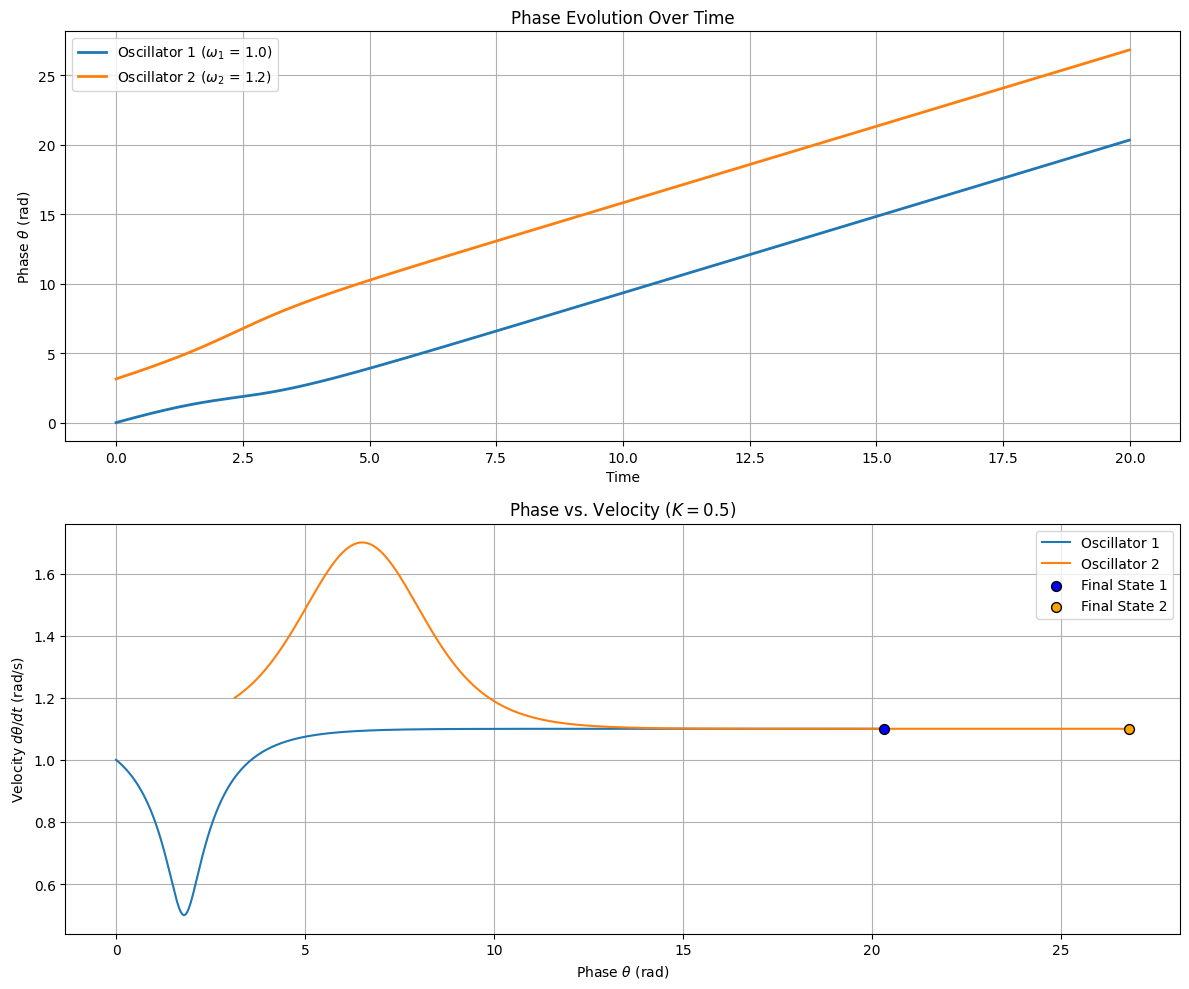

--- Explanation ---
1. Oscillation Through Time:
   - The top plot shows how the phases of the two oscillators change over time.
   - Initially, due to different natural frequencies (ω1 ≠ ω2), their phases evolve differently.
   - As time progresses, the coupling term (K * sin(diff)) causes them to adjust their speeds.
   - With sufficient coupling (K > 0), they tend to lock into a synchronized rhythm,
     meaning their phase difference becomes constant, even if their absolute phases keep increasing.

2. Phase vs Velocity (Cartesian Coordinates):
   - The bottom plot shows the relationship between an oscillator's phase and its instantaneous
     velocity (rate of phase change).
   - Without coupling, velocity would be constant at ω1 or ω2.
   - The coupling term (K * sin(...)) makes the velocity fluctuate based on the phase difference.
   - When synchronized, the velocity curves become more correlated, and the oscillators
     spend more time in states where their velocities are simil

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# --- Parameters for Two Kuramoto Oscillators ---
# Natural frequencies (ω) define their inherent oscillation speed
omega1 = 1.0  # Radians per time unit
omega2 = 1.2  # Radians per time unit

# Coupling strength (K) determines how much they influence each other
K = 0.5

# Time settings for simulation
T = 20         # Total time
dt = 0.01      # Time step
time = np.arange(0, T, dt)

# Initial phases (θ) - starting points of oscillations
theta1_0 = 0.0
theta2_0 = np.pi # Start pi radians out of phase

# --- Simulation ---
# Initialize phase arrays
theta1 = np.zeros_like(time)
theta2 = np.zeros_like(time)
# Set initial values
theta1[0] = theta1_0
theta2[0] = theta2_0

# Integrate the Kuramoto equations for each time step
# dθ1/dt = ω1 + K * sin(θ2 - θ1)
# dθ2/dt = ω2 + K * sin(θ1 - θ2)
for i in range(1, len(time)):
    dtheta1_dt = omega1 + K * np.sin(theta2[i-1] - theta1[i-1])
    dtheta2_dt = omega2 + K * np.sin(theta1[i-1] - theta2[i-1])

    # Update phases using Euler integration
    theta1[i] = theta1[i-1] + dtheta1_dt * dt
    theta2[i] = theta2[i-1] + dtheta2_dt * dt

    # Optional: Keep phases bounded between -π and π for cleaner plots
    #theta1[i] = np.arctan2(np.sin(theta1[i]), np.cos(theta1[i]))
    #theta2[i] = np.arctan2(np.sin(theta2[i]), np.cos(theta2[i]))

# Calculate instantaneous velocities (dθ/dt) for the second plot
vel1 = omega1 + K * np.sin(theta2 - theta1)
vel2 = omega2 + K * np.sin(theta1 - theta2)

# --- Plotting ---
fig, axs = plt.subplots(2, 1, figsize=(12, 10))

# 1) Plot: Oscillation (Phase vs Time)
axs[0].plot(time, theta1, label=f'Oscillator 1 ($\omega_1$ = {omega1})', linewidth=2)
axs[0].plot(time, theta2, label=f'Oscillator 2 ($\omega_2$ = {omega2})', linewidth=2)
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Phase $\\theta$ (rad)')
axs[0].set_title('Phase Evolution Over Time')
axs[0].legend()
axs[0].grid(True)

# 2) Plot: Phase vs Velocity (Cartesian coordinates)
axs[1].plot(theta1, vel1, label='Oscillator 1', linewidth=1.5)
axs[1].plot(theta2, vel2, label='Oscillator 2', linewidth=1.5)
# Plot final points to distinguish them
axs[1].scatter(theta1[-1], vel1[-1], s=50, c='blue', edgecolors='black', zorder=5, label='Final State 1')
axs[1].scatter(theta2[-1], vel2[-1], s=50, c='orange', edgecolors='black', zorder=5, label='Final State 2')

axs[1].set_xlabel('Phase $\\theta$ (rad)')
axs[1].set_ylabel('Velocity $d\\theta/dt$ (rad/s)')
axs[1].set_title(f'Phase vs. Velocity ($K={K}$)')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

# --- Explanation ---
print("--- Explanation ---")
print("1. Oscillation Through Time:")
print("   - The top plot shows how the phases of the two oscillators change over time.")
print("   - Initially, due to different natural frequencies (ω1 ≠ ω2), their phases evolve differently.")
print("   - As time progresses, the coupling term (K * sin(diff)) causes them to adjust their speeds.")
print("   - With sufficient coupling (K > 0), they tend to lock into a synchronized rhythm,")
print("     meaning their phase difference becomes constant, even if their absolute phases keep increasing.")
print("")
print("2. Phase vs Velocity (Cartesian Coordinates):")
print("   - The bottom plot shows the relationship between an oscillator's phase and its instantaneous")
print("     velocity (rate of phase change).")
print("   - Without coupling, velocity would be constant at ω1 or ω2.")
print("   - The coupling term (K * sin(...)) makes the velocity fluctuate based on the phase difference.")
print("   - When synchronized, the velocity curves become more correlated, and the oscillators")
print("     spend more time in states where their velocities are similar.")
print("-------------------")

# Kuramoto neural network

Simulating with Ring Topology: 100%|██████████| 1000/1000 [00:01<00:00, 631.42it/s]


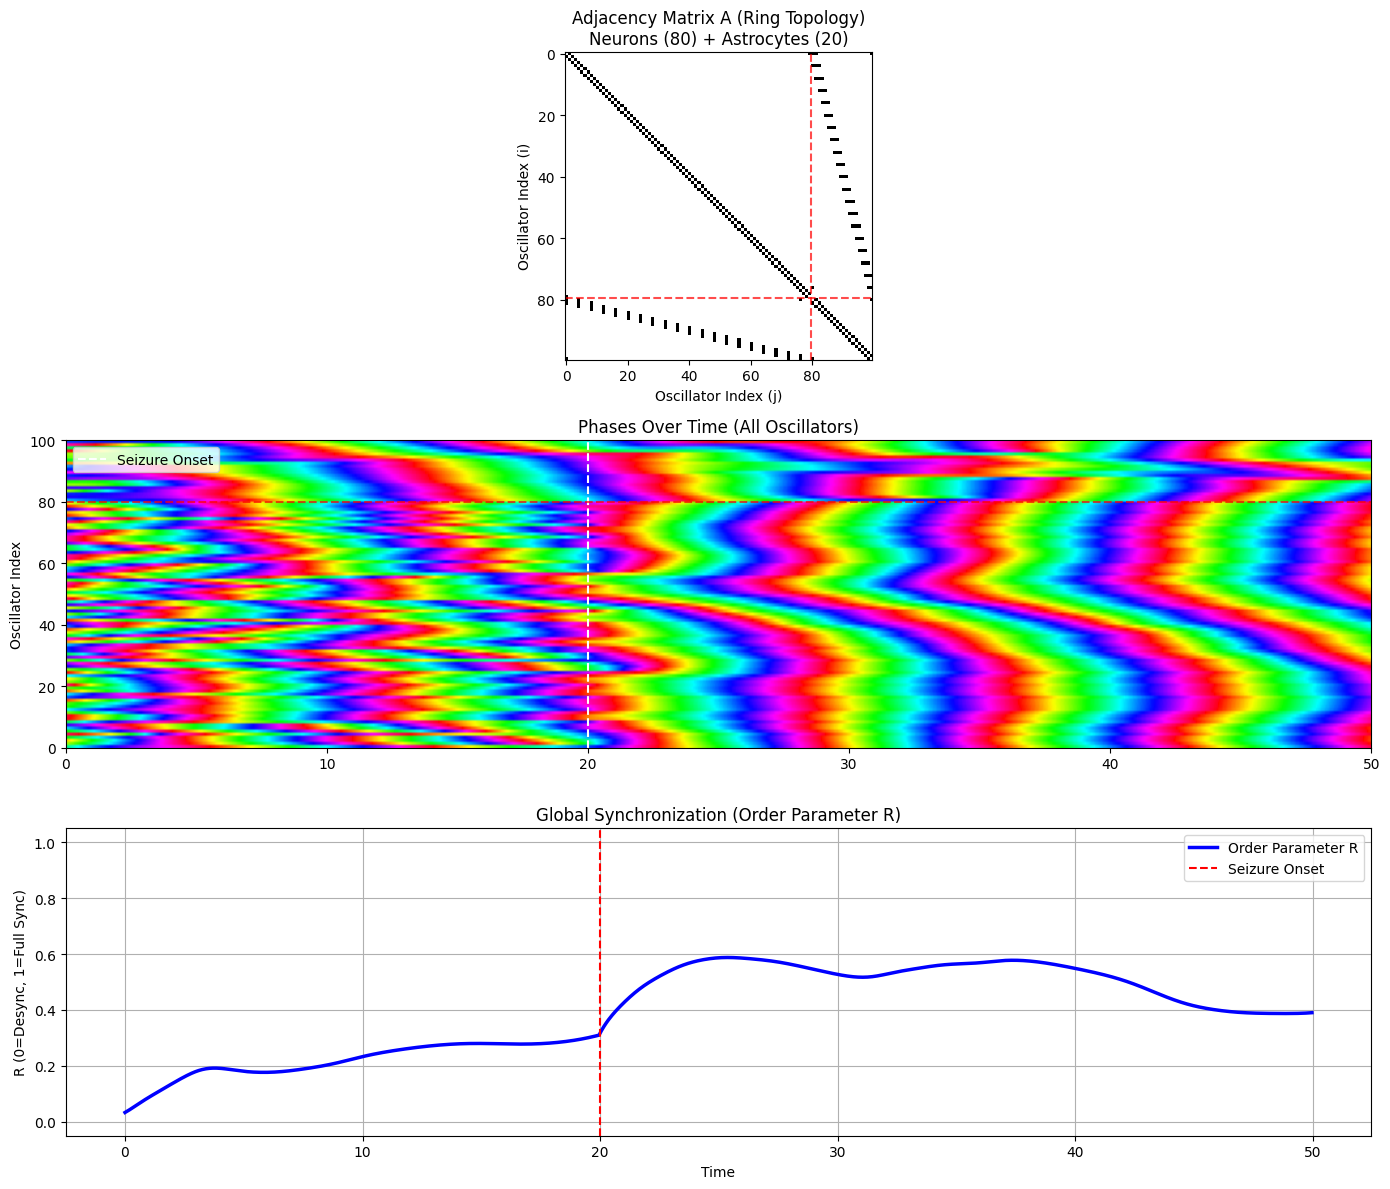


--- Simulation Summary ---
Average R before seizure (t<20): 0.221
Average R during/after seizure (t>=20): 0.509
Max R achieved: 0.588
--------------------------


In [1]:
# Install required packages (only needed once)
#!pip install numpy matplotlib tqdm

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# -------------------------------
# 📌 Kuramoto Model & DcKONN Concepts Applied
# -------------------------------
# The original repo models seizures as extreme sync in neuron-astrocyte networks.
# The PDF (DcKONN) details Kuramoto networks with specific topologies (e.g., ring)
# and external driving forces. We combine these ideas for a visualization.
# - Ring topology: Each oscillator couples only to neighbors (biologically plausible).
# - External input could modulate coupling/sync, but here we still use a global
#   coupling increase to simulate seizure, which is a simpler proxy for the
#   complex input-driven changes described in the paper.
# - The key output is the Kuramoto Order Parameter R, measuring sync.

# -------------------------------
# 🔧 Parameters (Based on DcKONN concepts and repo intent)
# -------------------------------
np.random.seed(42)

N_n = 80   # Number of neuron oscillators (reduce for easier viz)
N_a = 20   # Number of astrocyte oscillators
N = N_n + N_a

# Natural frequencies
omega_neuron = np.random.normal(1.0, 0.1, N_n) # Neurons: ~1 Hz
omega_astro = np.random.normal(0.3, 0.05, N_a) # Astrocytes: ~0.3 Hz
omega = np.concatenate([omega_neuron, omega_astro])

# Define adjacency matrix A for ring topology (locally coupled)
# Each neuron connects to its 2 nearest neighbors (periodic boundary conditions)
A = np.zeros((N, N))
# --- Neuron sub-network (Ring topology) ---
for i in range(N_n):
    A[i, (i-1)%N_n] = 1
    A[i, (i+1)%N_n] = 1
    # Uncomment next lines for 2-hop neighbors (i-2, i+2)
    # A[i, (i-2)%N_n] = 1
    # A[i, (i+2)%N_n] = 1

# --- Astrocyte sub-network (simple ring) ---
for i in range(N_n, N):
    idx_in_a = i - N_n
    A[i, N_n + ((idx_in_a-1)%N_a)] = 1
    A[i, N_n + ((idx_in_a+1)%N_a)] = 1

# --- Neuron-Astrocyte coupling (bidirectional, sparse) ---
# Couple every 4th neuron to an astrocyte for simplicity
coupling_step = 4
if N_a > 0:
    for i in range(0, N_n, coupling_step):
        for j_offset in [-1, 0, 1]: # Couple to a few nearby astrocytes
            j_idx = N_n + ((i // coupling_step) + j_offset) % N_a
            A[i, j_idx] = 1
            A[j_idx, i] = 1 # Ensure bidirectionality

# Define base coupling strengths K_base (k_ij in the paper)
K_base = np.zeros((N, N))
K_base[A != 0] = 0.2  # Base coupling where adjacency allows

# Time settings
T = 50       # Total simulation time
dt = 0.05
t = np.arange(0, T, dt)
steps = len(t)

# Seizure event: Increase neuron-neuron coupling at t=20
seizure_time = 20
seizure_idx = int(seizure_time / dt)

# -------------------------------
# 🧠 Simulation
# -------------------------------
theta = np.random.uniform(0, 2*np.pi, N)  # Initial phases
theta_history = np.zeros((steps, N))
order_param = np.zeros(steps)

for i in tqdm(range(steps), desc="Simulating with Ring Topology"):
    # Modify coupling matrix during seizure
    K_current = K_base.copy() # Start with base coupling
    if i >= seizure_idx:
        # During seizure, increase coupling *within* neuron network
        neuron_indices = slice(None, N_n)
        K_current[neuron_indices, neuron_indices] *= 5.0  # Boost factor

    # Calculate phase derivatives using ring topology (A matrix)
    dtheta = omega.copy() # Add natural frequency
    for j in range(N):
        # Sum only over neighbors defined by adjacency matrix A
        coupling_sum = np.sum(K_current[j, :] * A[j, :] * np.sin(theta - theta[j]))
        dtheta[j] += coupling_sum

    # Update phases (Euler integration)
    theta += dtheta * dt
    theta = np.mod(theta, 2*np.pi)  # Wrap phases to [0, 2π]

    # Store history
    theta_history[i, :] = theta

    # Calculate Kuramoto Order Parameter R
    z_complex = np.mean(np.exp(1j * theta)) # Average of phase vectors
    R = np.abs(z_complex)
    order_param[i] = R

# -------------------------------
# 📈 Visualization
# -------------------------------
fig, axes = plt.subplots(3, 1, figsize=(14, 12))

# 1. Adjacency Matrix (Structure)
im1 = axes[0].imshow(A, cmap='gray_r', interpolation='nearest')
axes[0].set_title(f'Adjacency Matrix A (Ring Topology)\nNeurons ({N_n}) + Astrocytes ({N_a})')
axes[0].set_xlabel('Oscillator Index (j)')
axes[0].set_ylabel('Oscillator Index (i)')
# Add a line to visually separate neurons from astrocytes
axes[0].axhline(y=N_n - 0.5, color='red', linestyle='--', alpha=0.7)
axes[0].axvline(x=N_n - 0.5, color='red', linestyle='--', alpha=0.7)

# 2. Phases over time (All Oscillators)
im2 = axes[1].imshow(theta_history.T, aspect='auto', origin='lower',
                     extent=[0, T, 0, N], cmap='hsv', vmin=0, vmax=2*np.pi)
axes[1].axvline(seizure_time, color='white', linestyle='--', label='Seizure Onset')
axes[1].set_title('Phases Over Time (All Oscillators)')
axes[1].set_ylabel('Oscillator Index')
axes[1].legend(loc='upper left')
# Add lines to separate neuron and astrocyte regions
axes[1].axhline(y=N_n, color='red', linestyle='--', alpha=0.7)

# 3. Order Parameter R (Global Synchrony)
axes[2].plot(t, order_param, 'b-', linewidth=2.5, label='Order Parameter R')
axes[2].axvline(seizure_time, color='red', linestyle='--', label='Seizure Onset')
axes[2].set_title('Global Synchronization (Order Parameter R)')
axes[2].set_xlabel('Time')
axes[2].set_ylabel('R (0=Desync, 1=Full Sync)')
axes[2].set_ylim(-0.05, 1.05)
axes[2].grid(True)
axes[2].legend()

plt.tight_layout()
plt.show()

# Print summary statistics around seizure
print("\n--- Simulation Summary ---")
print(f"Average R before seizure (t<{seizure_time}): {np.mean(order_param[:seizure_idx]):.3f}")
print(f"Average R during/after seizure (t>={seizure_time}): {np.mean(order_param[seizure_idx:]):.3f}")
print(f"Max R achieved: {np.max(order_param):.3f}")
print("--------------------------")
